In [17]:
import systems.switching_np_system as switching_system
import systems.server_switch_np_system as server_switch_system

We'll compare the **server switching system**, which changes priority every time the server empties. To the **arrival switching system**, which changes priority every time an arrival comes by routing jobs to different classes.

In [18]:
def run_arrival_switching_system(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, stay_prob):
	lambda_ = lambda1 + lambda2

	system1 = switching_system.SwitchingNPSystem(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, stay_prob)
	switching_res = system1.simulate()

	ET1_arrival_switch = sum(switching_res.T1s)/len(switching_res.T1s)
	ET2_arrival_switch = sum(switching_res.T2s)/len(switching_res.T2s)

	EN1_arrival_switch = sum(switching_res.N1s)/len(switching_res.N1s)
	EN2_arrival_switch = sum(switching_res.N2s)/len(switching_res.N2s)

	ET_arrival_switch = lambda1/lambda_*ET1_arrival_switch + lambda2/lambda_*ET2_arrival_switch
	EN_arrival_switch = EN1_arrival_switch + EN2_arrival_switch

	return ET1_arrival_switch, ET2_arrival_switch, EN1_arrival_switch, EN2_arrival_switch, ET_arrival_switch, EN_arrival_switch

def run_server_switching_system(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, stay_prob):
	lambda_ = lambda1 + lambda2

	system1 = server_switch_system.ServerSwitchNPSystem(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, stay_prob)
	T1_runs, T2_runs, _, _, N1_runs, N2_runs, S1_runs, S2_runs = system1.simulate()

	ET1_server_switch = sum(T1_runs)/len(T1_runs)
	ET2_server_switch = sum(T2_runs)/len(T2_runs)

	EN1_server_switch = sum(N1_runs)/len(N1_runs)
	EN2_server_switch = sum(N2_runs)/len(N2_runs)

	ET_server_switch = lambda1/lambda_*ET1_server_switch + lambda2/lambda_*ET2_server_switch
	EN_server_switch = EN1_server_switch + EN2_server_switch

	return ET1_server_switch, ET2_server_switch, EN1_server_switch, EN2_server_switch, ET_server_switch, EN_server_switch

In [19]:
import matplotlib.pyplot as plt
stay_probs = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Fix mus:
mu1 = 20000
mu2 = 10000

def make_plots(num_runs, num_jobs_per_run, rho1, rho2):
    rho = rho1 + rho2

    lambda1 = rho1*mu1
    lambda2 = rho2*mu2
    lambda_ = lambda1 + lambda2

    print("Lambda1: {}, Lambda2: {}, Lambda: {}".format(lambda1, lambda2, lambda_))

    ET1s_arrival = []
    expectedT1s_arrival = []
    ET1s_server = []

    ET2s_arrival = []
    expectedT2s_arrival = []
    ET2s_server = []

    EN1s_arrival = []
    EN1s_server = []

    EN2s_arrival = []
    EN2s_server = []

    ETs_arrival = []
    expectedTs_arrival=[]
    ETs_server = []

    ENs_arrival = []
    ENs_server = []

    Ssquared = lambda1/lambda_ * 2/(mu1**2) + lambda2/lambda_ * 2/(mu2**2)
    S = lambda1/lambda_ * 1/mu1 + lambda2/lambda_ * 1/mu2
    Se = Ssquared/(2*S)

    for p in stay_probs:
        print("Running for p= {}".format(p))
        T1_switch, T2_switch, N1_switch, N2_switch, T_switch, N_switch = run_arrival_switching_system(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, p)
        print("Arrival system done with {}".format(p))
        T1_server, T2_server, N1_server, N2_server, T_server, N_server = run_server_switching_system(num_runs, num_jobs_per_run, lambda1, lambda2, mu1, mu2, p)
        print("Server system done with {}".format(p))

        rhoA = p*rho1 + (1-p)*rho2
        rhoB = p*rho2 + (1-p)*rho1

        lambdaA = lambda1*p + lambda2*(1-p)
        lambdaB = lambda1*(1-p) + lambda2*p

        expected_TAQ = rho*Se/(1-rhoA)
        expected_TBQ = rho*Se/((1-rho)*(1-rhoA))

        expected_T1 = p*expected_TAQ + (1-p)*expected_TBQ + 1/mu1
        expected_T2 = p*expected_TBQ + (1-p)*expected_TAQ + 1/mu2
        expected_T = lambda1/lambda_*expected_T1 + lambda2/lambda_*expected_T2

        ET1s_arrival.append(T1_switch)
        expectedT1s_arrival.append(expected_T1)
        ET1s_server.append(T1_server)

        EN1s_arrival.append(N1_switch)
        EN1s_server.append(N1_server)

        ET2s_arrival.append(T2_switch)
        expectedT2s_arrival.append(expected_T2)
        ET2s_server.append(T2_server)

        EN2s_arrival.append(N2_switch)
        EN2s_server.append(N2_server)

        ETs_arrival.append(T_switch)
        expectedTs_arrival.append(expected_T)
        ETs_server.append(T_server)

        ENs_arrival.append(N_switch)
        ENs_server.append(N_server)

    plt.plot(stay_probs, ET1s_arrival, label="Arrival switching system")
    plt.plot(stay_probs, ET1s_server, label="Server switching system")
    plt.legend()
    plt.title('Average Class 1 Response Time, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

    plt.plot(stay_probs, ET2s_arrival, label="Arrival switching system")
    plt.plot(stay_probs, ET2s_server, label="Server switching system")
    plt.legend()
    plt.title('Average Class 2 Response Time, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

    plt.plot(stay_probs, ETs_arrival, label="Arrival switching system")
    plt.plot(stay_probs, ETs_server, label="Server switching system")
    plt.legend()
    plt.title('Average Overall Response Time, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

    # plt.plot(stay_probs, EN1s_arrival, label="Arrival switching system")
    # plt.plot(stay_probs, EN1s_server, label="Server switching system")
    # plt.legend()
    # plt.title('Average Number of Class 1 Jobs, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    # plt.xlabel('Probability Class 1 Priority')
    # plt.ylabel('Time')
    # plt.show()

    # plt.plot(stay_probs, EN2s_arrival, label="Arrival switching system")
    # plt.plot(stay_probs, EN2s_server, label="Server switching system")
    # plt.legend()
    # plt.title('Average Number of Class 2 Jobs, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    # plt.xlabel('Probability Class 1 Priority')
    # plt.ylabel('Time')
    # plt.show()

    # plt.plot(stay_probs, ENs_arrival, label="Arrival switching system")
    # plt.plot(stay_probs, ENs_server, label="Server switching system")
    # plt.legend()
    # plt.title('Average Number of Jobs Total, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    # plt.xlabel('Probability Class 1 Priority')
    # plt.ylabel('Time')
    # plt.show()

    plt.plot(stay_probs, expectedT1s_arrival, label="Expected time")
    plt.plot(stay_probs, ET1s_arrival, label="Actual time")
    plt.legend()
    plt.title('Theoretical vs. Actual Class 1 Response Time for Switching System, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

    plt.plot(stay_probs, expectedT2s_arrival, label="Expected time")
    plt.plot(stay_probs, ET2s_arrival, label="Actual time")
    plt.legend()
    plt.title('Theoretical vs. Actual Class 2 Response Time for Switching System, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

    plt.plot(stay_probs, expectedTs_arrival, label="Expected time")
    plt.plot(stay_probs, ETs_arrival, label="Actual time")
    plt.legend()
    plt.title('Theoretical vs. Actual Overall Response Time for Switching System, rho1 = {}, rho2 = {}'.format(rho1, rho2))
    plt.xlabel('Probability Class 1 Priority')
    plt.ylabel('Time')
    plt.show()

In [20]:
# for (rho1, rho2) in [(0.05, 0.90), (0.1, 0.8), (0.2, 0.5), (0.3, 0.6), (0.2, 0.2), (0.3, 0.1), (0.1, 0.2), (0.25, 0.05)]:
make_plots(1000, 1000, 0.2, 0.1)

Lambda1: 4000.0, Lambda2: 1000.0, Lambda: 5000.0
Running for p= 0


KeyboardInterrupt: 

Lambda1: 2000.0, Lambda2: 2000.0, Lambda: 4000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


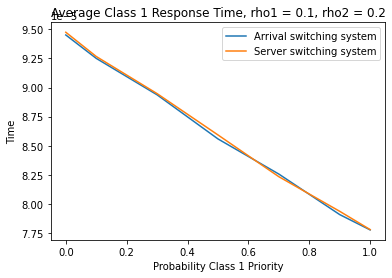

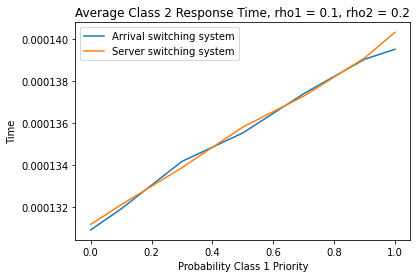

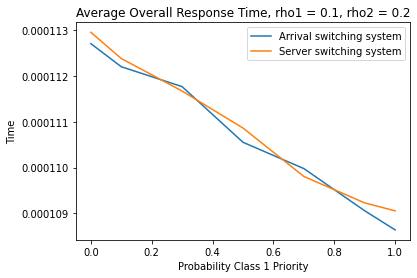

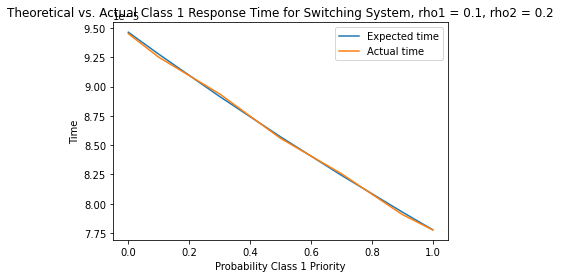

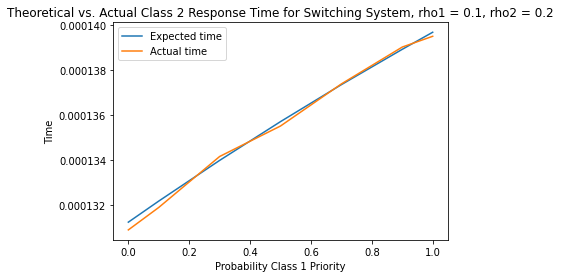

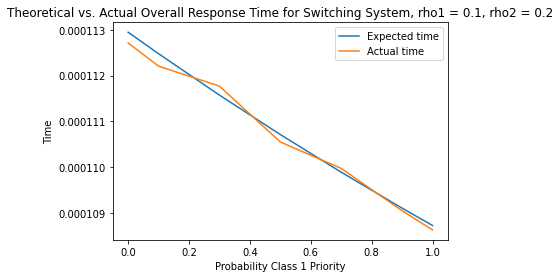

In [ ]:
make_plots(1000, 1000, 0.1, 0.2)

Lambda1: 8000.0, Lambda2: 4000.0, Lambda: 12000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


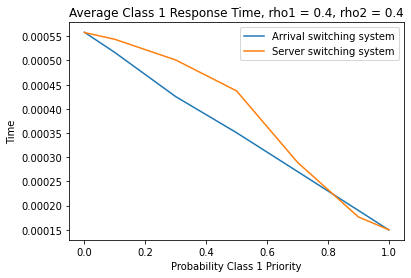

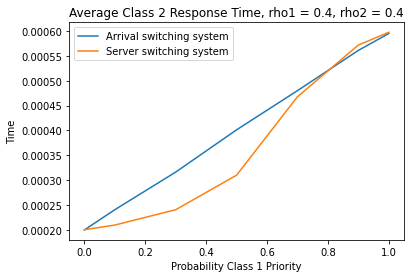

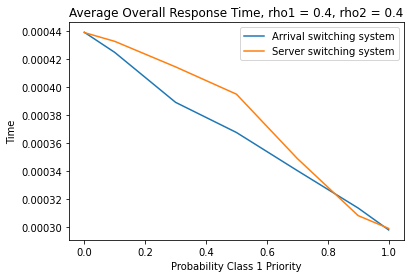

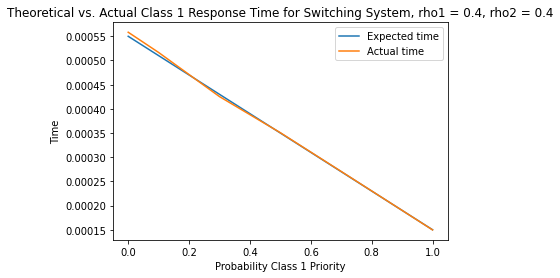

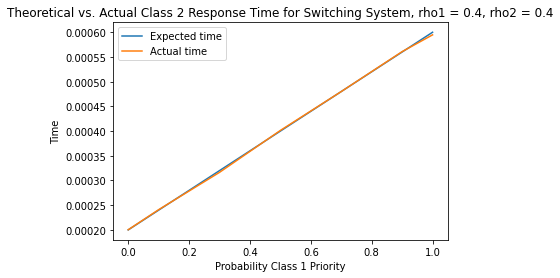

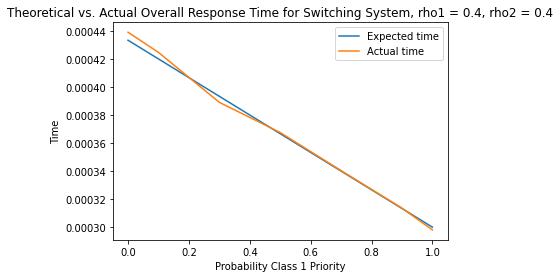

In [ ]:
make_plots(1000, 1000, 0.4, 0.4)

Lambda1: 5000.0, Lambda2: 2500.0, Lambda: 7500.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


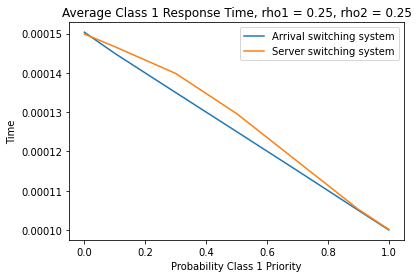

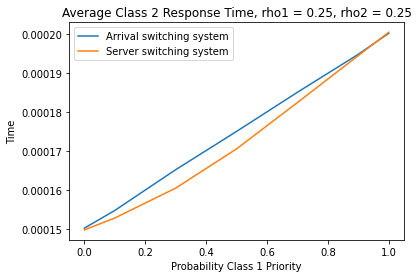

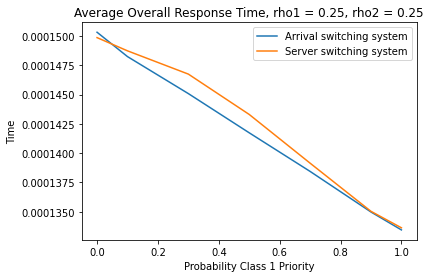

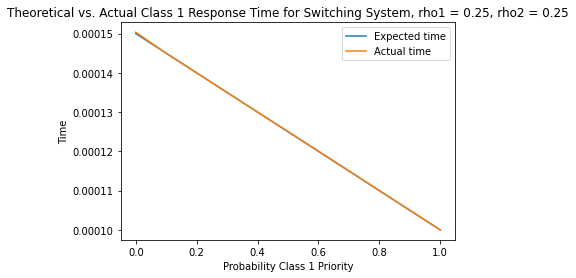

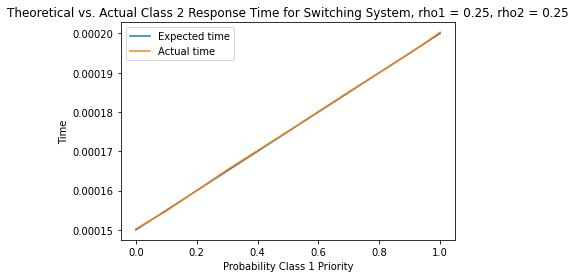

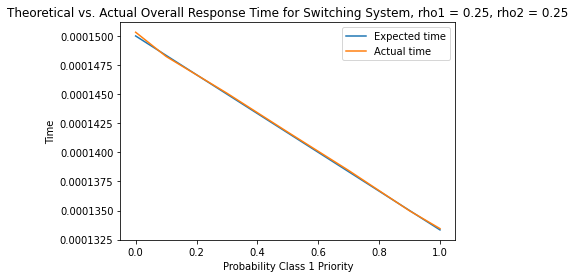

In [ ]:
make_plots(1000, 1000, 0.25, 0.25)

Lambda1: 4000.0, Lambda2: 2000.0, Lambda: 6000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


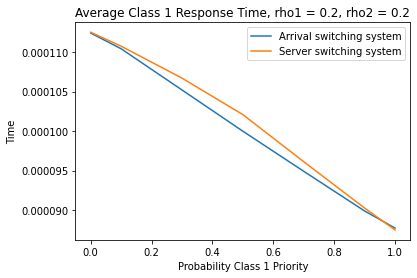

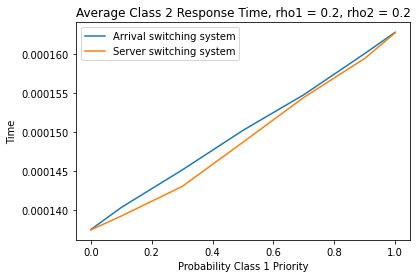

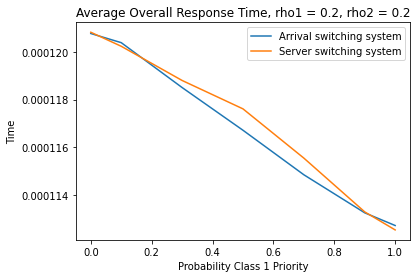

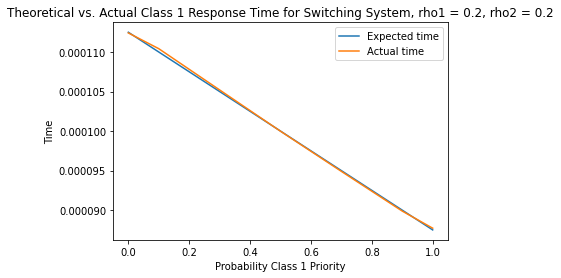

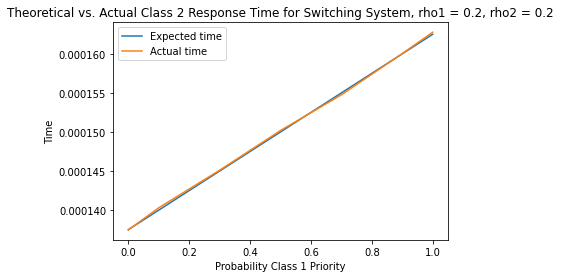

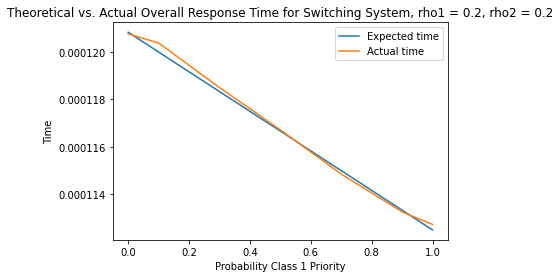

In [ ]:
make_plots(1000, 1000, 0.2, 0.2)

Lambda1: 4000.0, Lambda2: 3000.0, Lambda: 7000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


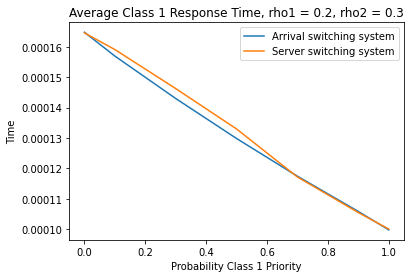

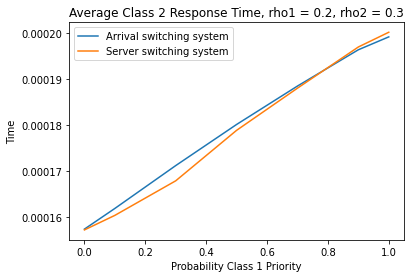

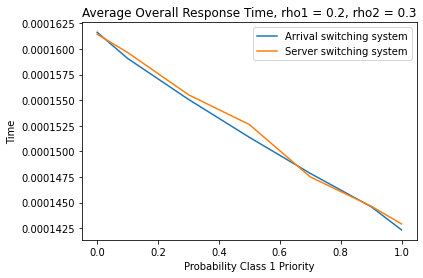

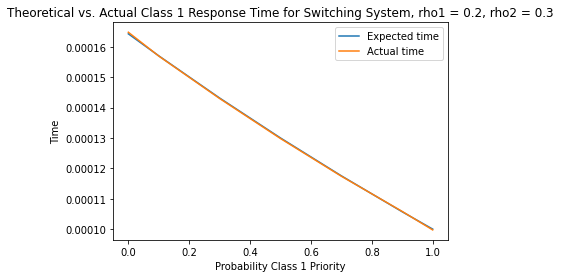

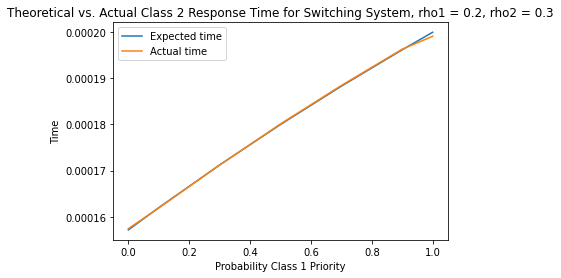

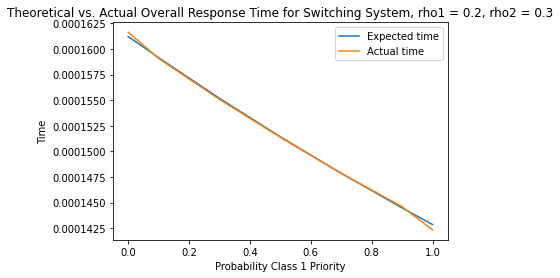

In [ ]:
make_plots(1000, 1000, 0.2, 0.3)

Lambda1: 6000.0, Lambda2: 2000.0, Lambda: 8000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


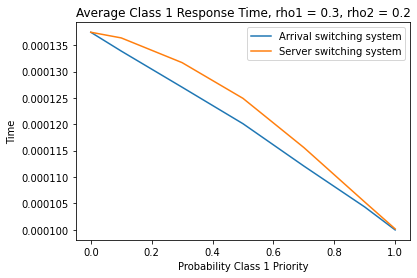

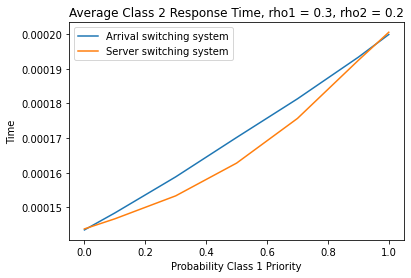

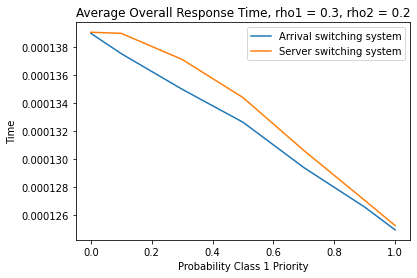

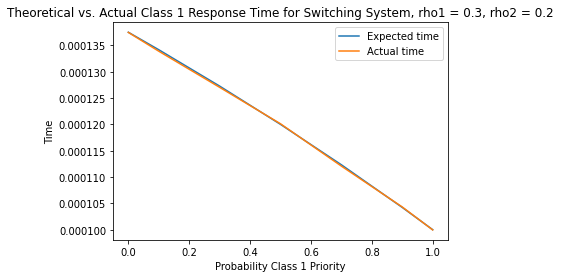

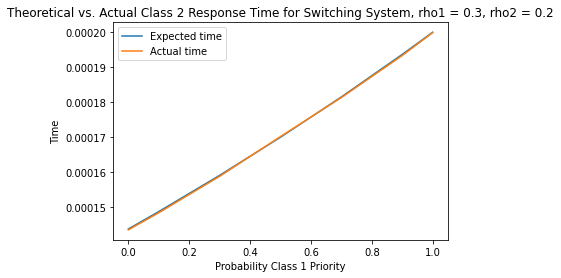

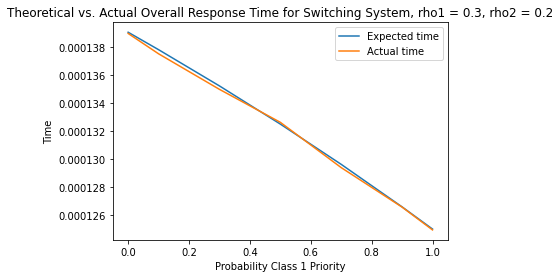

In [ ]:
make_plots(1000, 1000, 0.3, 0.2)

Lambda1: 8000.0, Lambda2: 5000.0, Lambda: 13000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


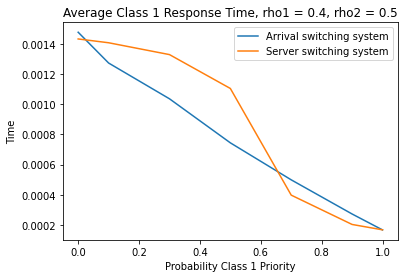

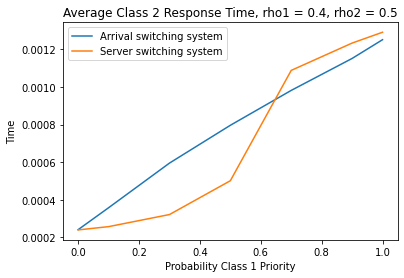

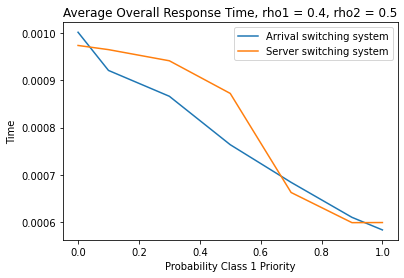

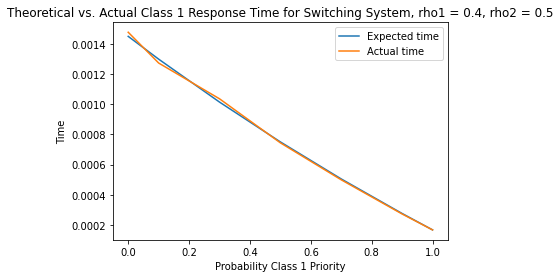

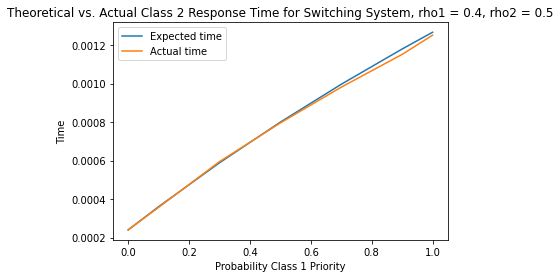

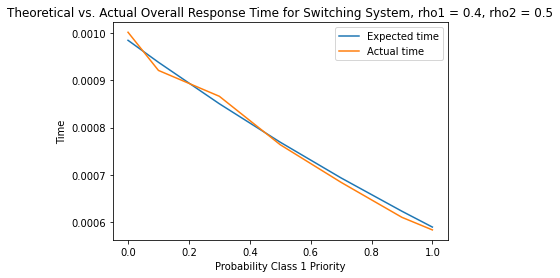

In [ ]:
make_plots(1000, 1000, 0.4, 0.5)

Lambda1: 6000.0, Lambda2: 1000.0, Lambda: 7000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


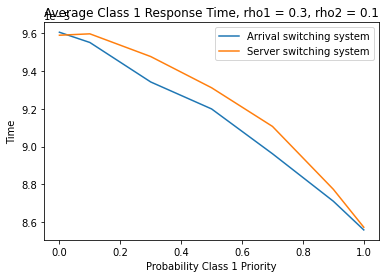

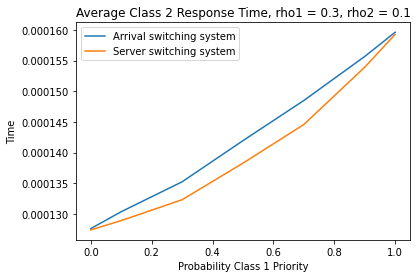

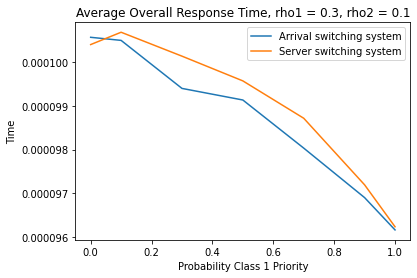

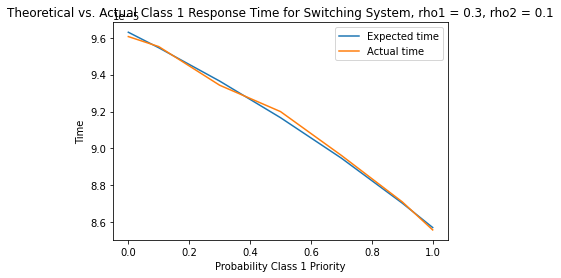

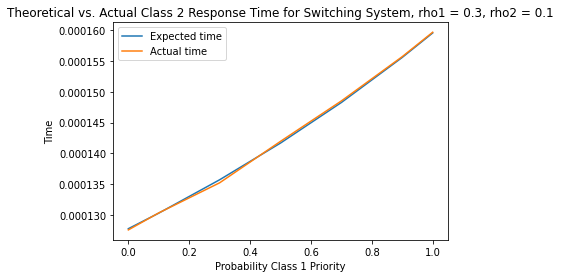

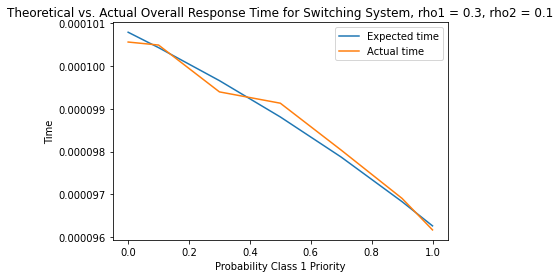

In [ ]:
make_plots(200, 1000, 0.3, 0.1)

Lambda1: 2000.0, Lambda2: 7000.0, Lambda: 9000.0
Running for p= 0
Arrival system done with 0
Server system done with 0
Running for p= 0.1
Arrival system done with 0.1
Server system done with 0.1
Running for p= 0.3
Arrival system done with 0.3
Server system done with 0.3
Running for p= 0.5
Arrival system done with 0.5
Server system done with 0.5
Running for p= 0.7
Arrival system done with 0.7
Server system done with 0.7
Running for p= 0.9
Arrival system done with 0.9
Server system done with 0.9
Running for p= 1.0
Arrival system done with 1.0
Server system done with 1.0


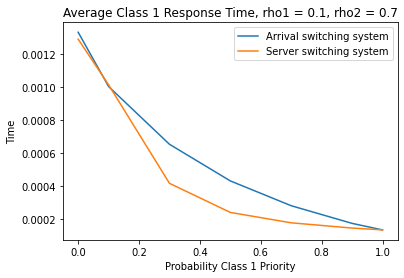

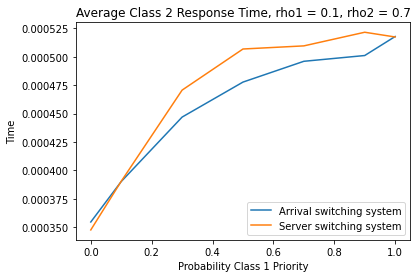

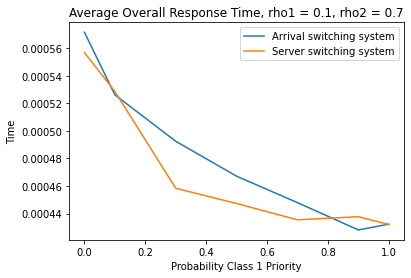

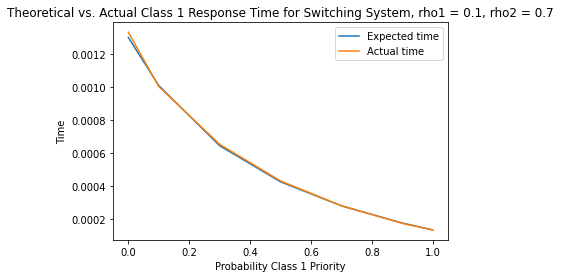

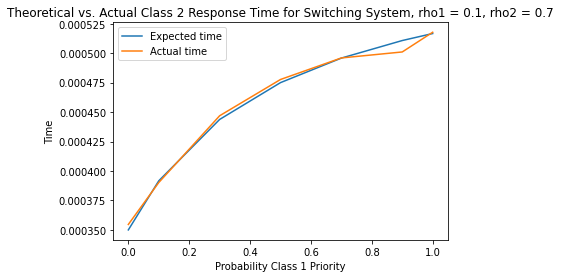

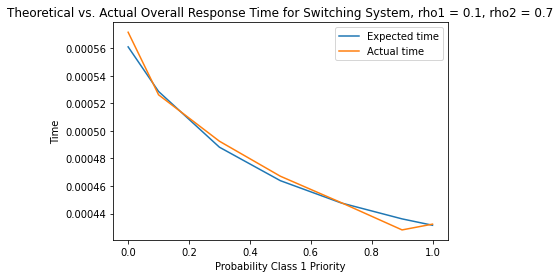

In [ ]:
make_plots(200, 1000, 0.1, 0.7)

# Mixing Time Analysis
We'll start by understanding the mixing time for the strict non-preemptive priority system.

In [37]:
from simulate import run_np_basic
mu1 = 2000
mu2 = 1000
for (rho1, rho2) in [(0.1, 0.2), (0.2, 0.1), (0.4, 0.3), (0.4, 0.5)]:
    expectedMT1, actualMT1, expectedMT2, actualMT2 = run_np_basic(500, 1000, rho1*mu1, rho2*mu2, mu1, mu2, False)
    print("Rho1: {}\t Rho2: {}\t Expected MT1: {:.6f}\t Actual MT1: {:.6f}\t Expected MT2: {:.6f}\t Actual MT2: {:.6f}".format(rho1, rho2, expectedMT1, actualMT1, expectedMT2, actualMT2))

TypeError: run_np_basic() got an unexpected keyword argument 'verbose'